In [ ]:
!pip install ultralytics ultralyticsplus==0.0.14 datasets roboflow

In [ ]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('ultralyticsplus/yolov8s')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
image = 'https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg'

# perform inference
results = model.predict(image)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])
render.show()

In [ ]:
from datasets import load_dataset
dataset = load_dataset("Francesco/road-signs-6ih4y")

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eSZygSglbKqbRmFYZDiU")
project = rf.workspace("roboflow-100").project("road-signs-6ih4y")
dataset = project.version(2).download("yolov8")

In [12]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="/content/road-signs-2/data.yaml", epochs=5)

Ultralytics YOLOv8.0.8 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/road-signs-2/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nm

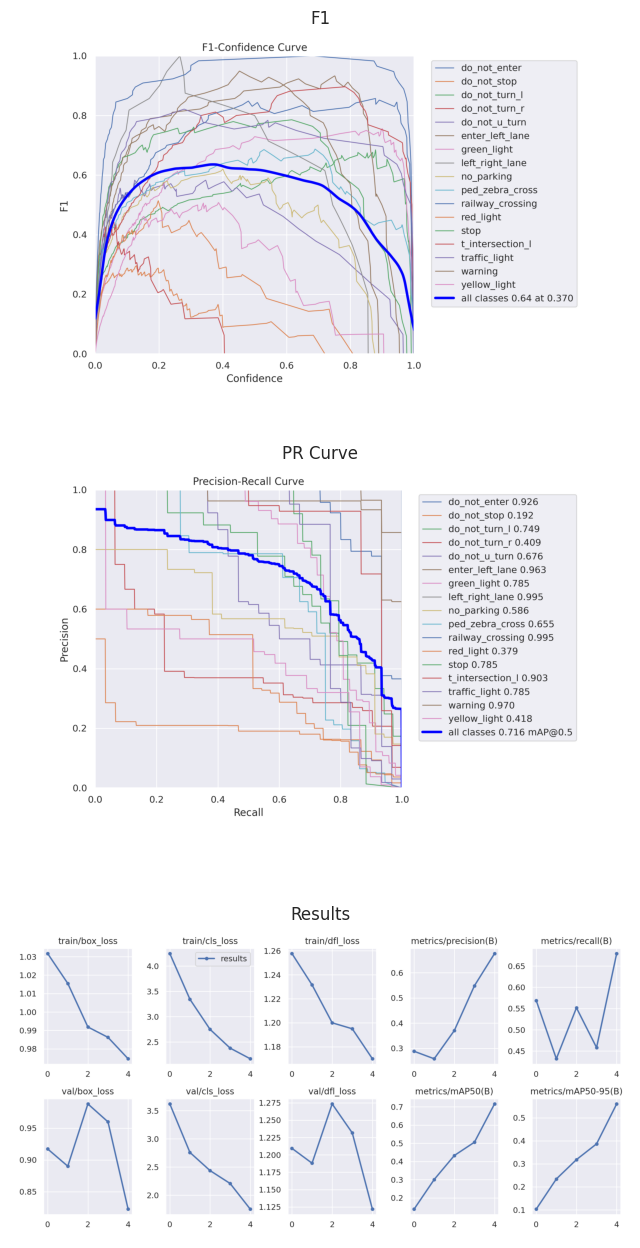

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Загрузка изображений
img1 = mpimg.imread('/content/runs/detect/train2/F1_curve.png')
img2 = mpimg.imread('/content/runs/detect/train2/PR_curve.png')
img3 = mpimg.imread('/content/runs/detect/train2/results.png')

# Создание сетки для отображения изображений
fig, axes = plt.subplots(3, 1, figsize=(8, 16))  # Увеличиваем высоту фигуры

# Отображение изображений подряд
axes[0].imshow(img1)
axes[0].axis('off')
axes[0].set_title('F1')

axes[1].imshow(img2)
axes[1].axis('off')
axes[1].set_title('PR Curve')

axes[2].imshow(img3)
axes[2].axis('off')
axes[2].set_title('Results')

# Показать изображения
plt.show()
